In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('내국인출국교통수단별_20230303141138.csv',encoding='cp949',header = 1)
pd_data.columns = ['시점','공항','항구']
print(pd_data)

         시점      공항     항구
0   2015.01  226687  50545
1   2015.02  173950  44152
2   2015.03  175351  36822
3   2015.04  195851  46589
4   2015.05  199356  54680
..      ...     ...    ...
91  2022.08   47261   3533
92  2022.09   37030   2682
93  2022.10   71579   3494
94  2022.11  126419   3687
95  2022.12  192723   5760

[96 rows x 3 columns]


         시점      공항    항구
84  2022.01     938  3279
85  2022.02     855  3179
86  2022.03     986  3418
87  2022.04    1823  3158
88  2022.05    3418  3231
89  2022.06    7835  3105
90  2022.07   42841  3326
91  2022.08   47261  3533
92  2022.09   37030  2682
93  2022.10   71579  3494
94  2022.11  126419  3687
95  2022.12  192723  5760
                시점             공항           항구
count    12.000000      12.000000    12.000000
mean   2022.065000   44475.666667  3487.666667
std       0.036056   60324.578943   759.498918
min    2022.010000     855.000000  2682.000000
25%    2022.037500    1613.750000  3173.750000
50%    2022.065000   22432.500000  3302.500000
75%    2022.092500   53340.500000  3503.750000
max    2022.120000  192723.000000  5760.000000


C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2022[n+'_norm'] = sub_data2022[n].apply(lambda x : (x-value_min)/(value_max - value_min))
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2022[n+'_std'] = sub_data2022[n].apply(lambda x : (x-value_mean)/value_std)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:10: SettingWithCopyWarning: 
A value is tryi

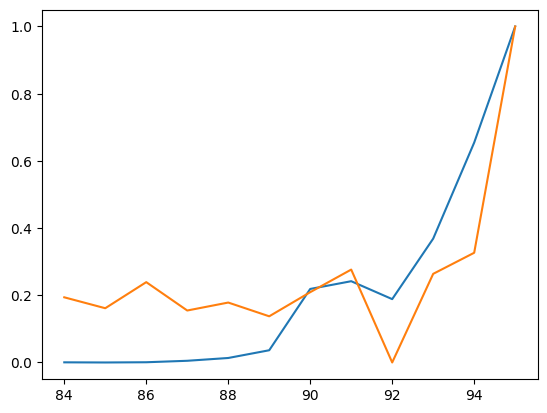

In [8]:
sub_data2022 = pd_data.tail(12)
print(sub_data2022)
print(sub_data2022.describe())

for n in ['공항','항구']:
    value_min = sub_data2022[n].min()
    value_max = sub_data2022[n].max()
    value_mean = sub_data2022[n].mean()
    value_std = sub_data2022[n].std()
    sub_data2022[n+'_norm'] = sub_data2022[n].apply(lambda x : (x-value_min)/(value_max - value_min))
    sub_data2022[n+'_std'] = sub_data2022[n].apply(lambda x : (x-value_mean)/value_std)

def normal(pd_data,x):
    min_x = pd_data[x].min()
    max_x = pd_data[x].max()
    pd_data[x+'_norm'] = pd_data[x].apply(lambda x :(x-min_x)/(max_x-min_x))
    return pd_data[x+'_norm']

def std(pd_data,x):
    x_mean = pd_data[x].mean()
    x_std = pd_data[x].std()
    pd_data[x+'_std'] = pd_data[x].apply(lambda x: (x-x_mean)/x_std)
    return pd_data[x+'_std']


_,axe = plt.subplots()
axe.plot(sub_data2022['공항_norm'])
axe.plot(sub_data2022['항구_norm'])

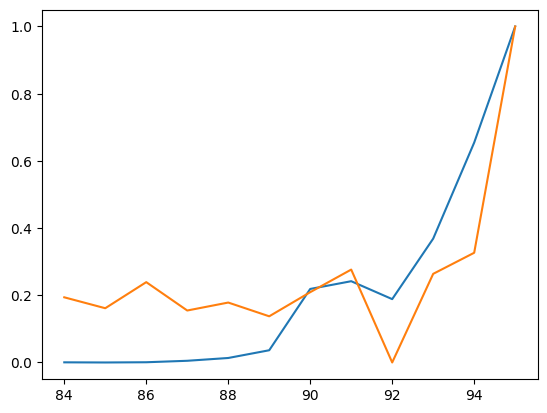

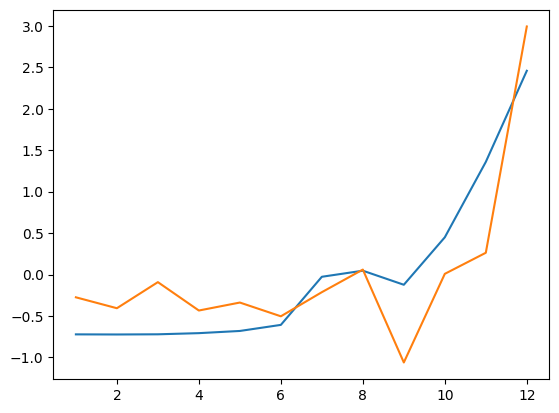

In [19]:
# normalization
_,axe = plt.subplots()
axe.plot(normal(sub_data2022,'공항'))
axe.plot(normal(sub_data2022,'항구'))

#standardlization
_,axe = plt.subplots()
axe.plot(np.arange(1,13),std(sub_data2022,'공항'))
axe.plot(np.arange(1,13),std(sub_data2022,'항구'))

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data[x+'_norm'] = pd_data[x].apply(lambda x :(x-min_x)/(max_x-min_x))
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data[x+'_std'] = pd_data[x].apply(lambda x: (x-x_mean)/x_std)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8312\2496903235.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

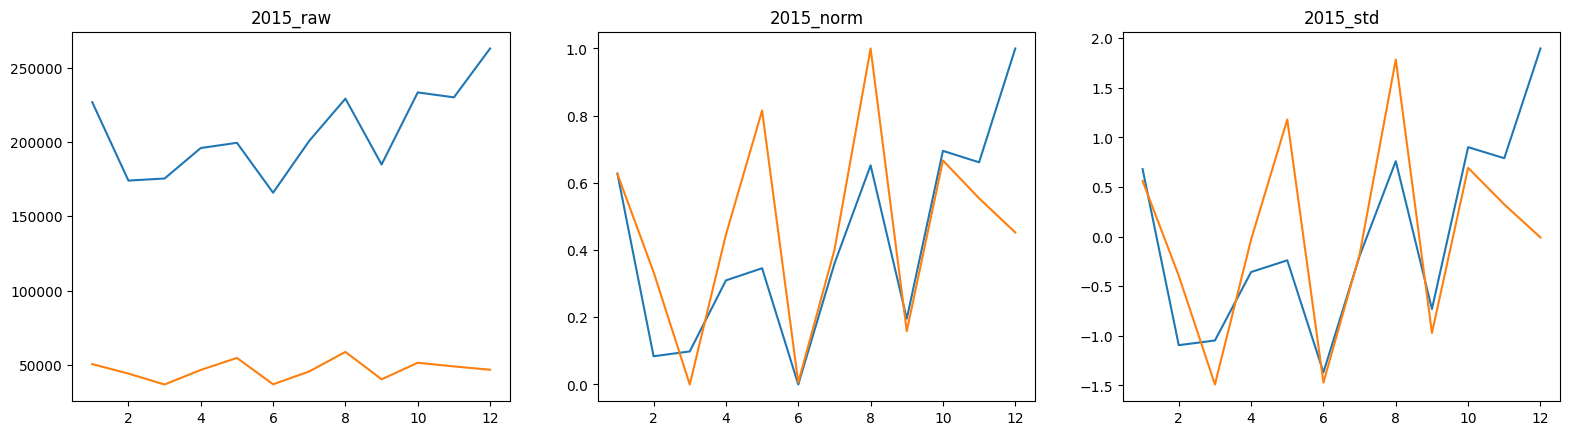

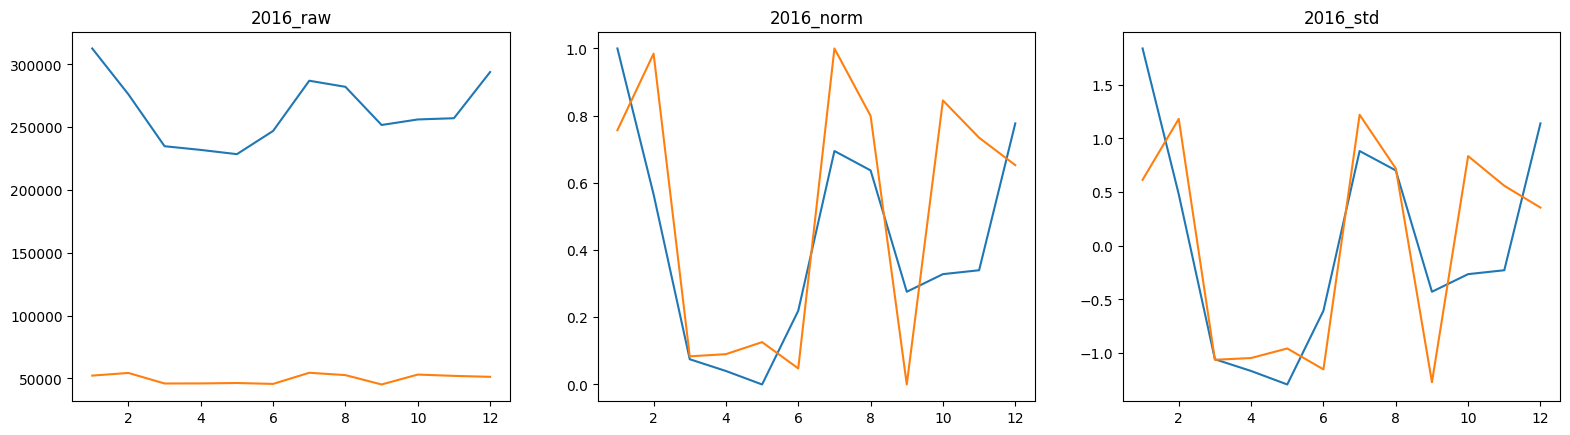

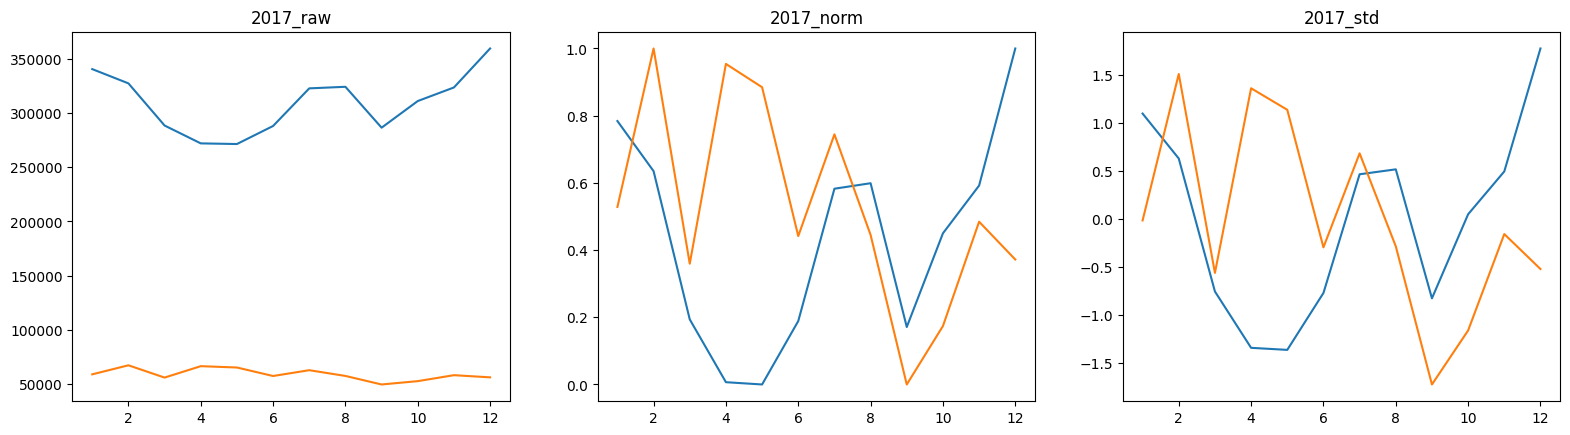

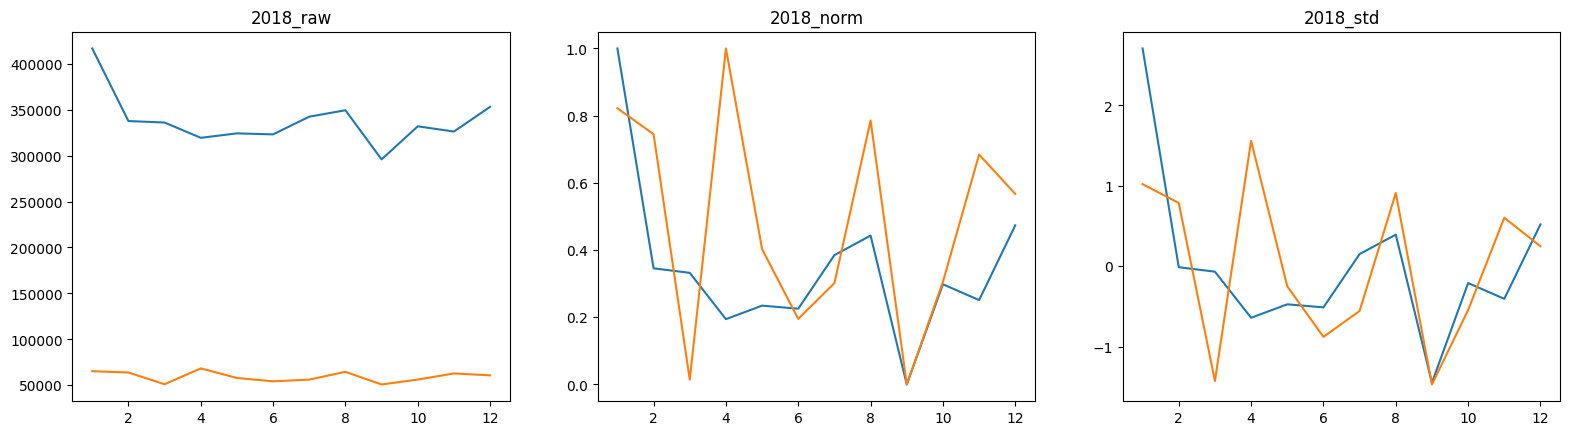

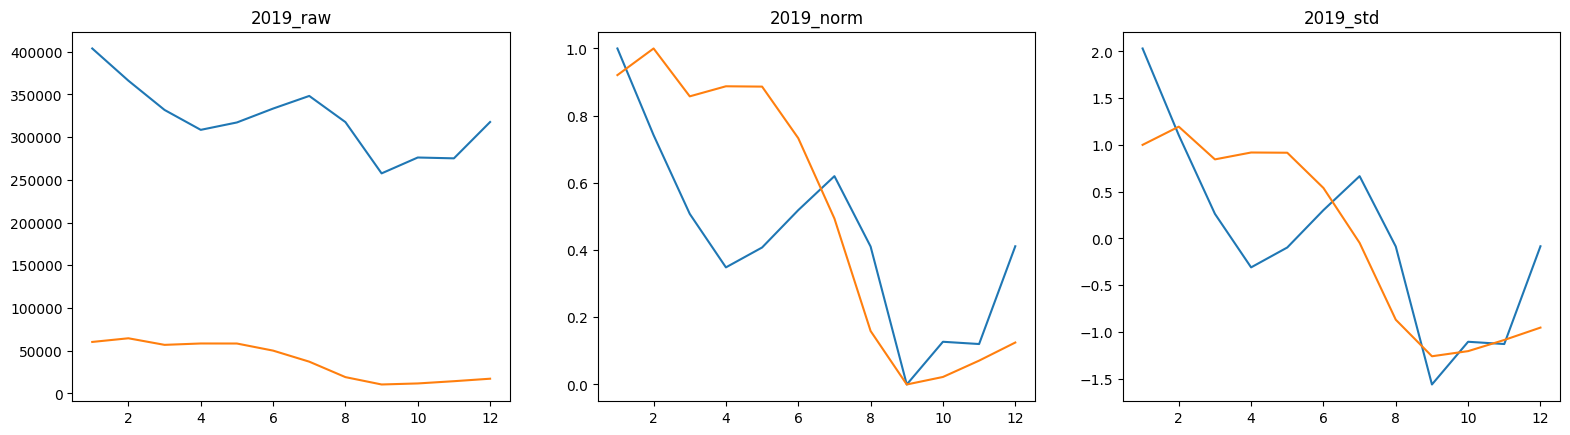

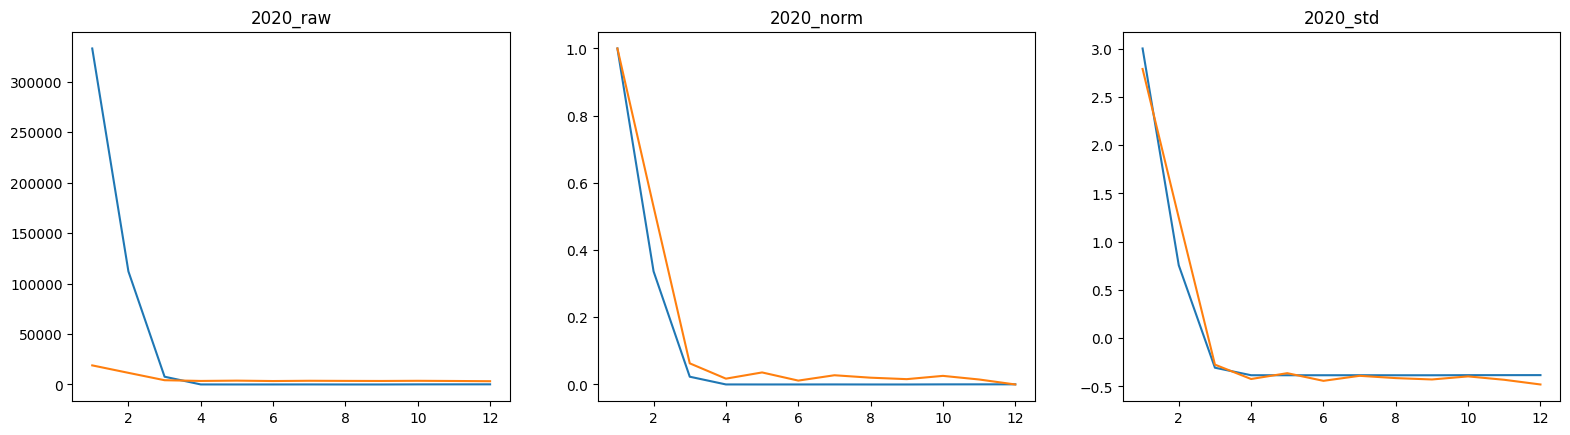

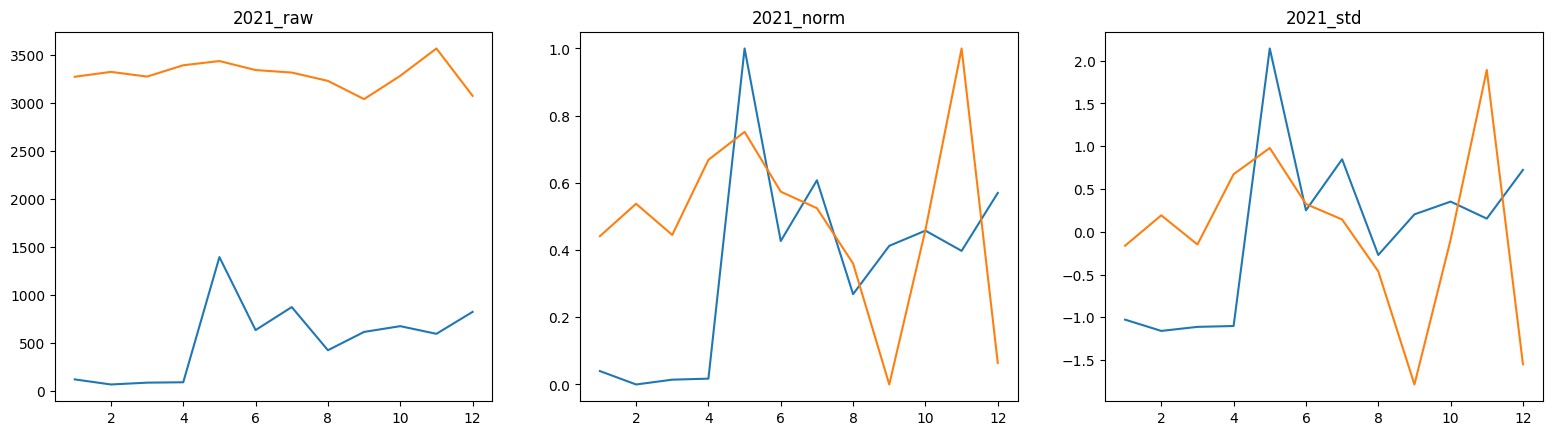

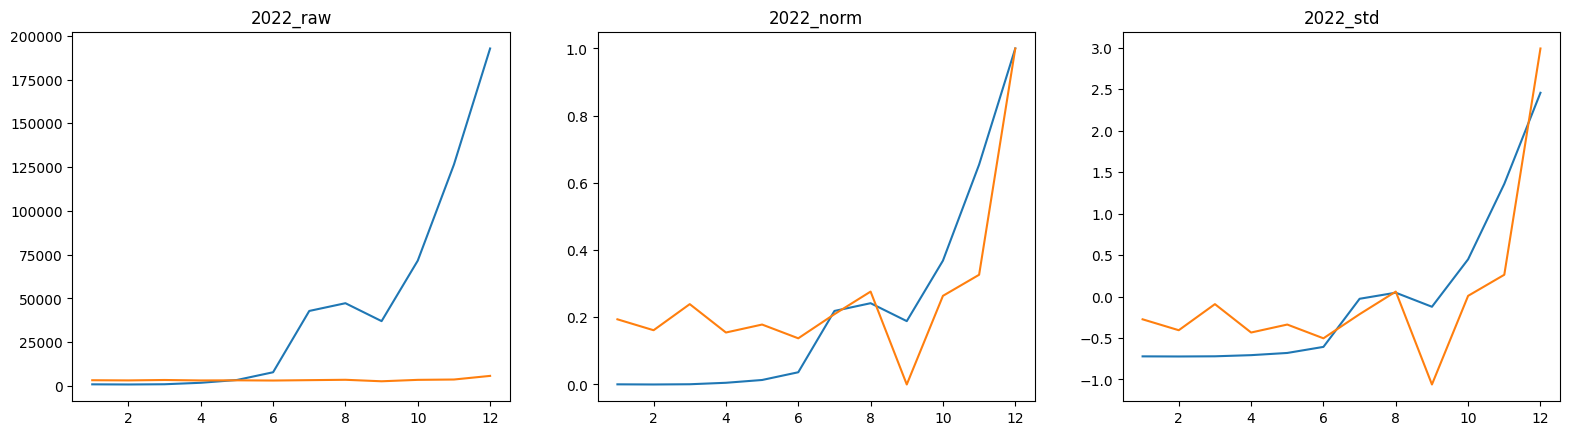

In [41]:
#print(pd_data)
for i in range(8):
    #print(i,12*i,12*(i+1))
    sub_data = pd_data.iloc[12*i:12*(i+1)]
    
    for n in ['공항','항구']:
        normal(sub_data,n)
        std(sub_data,n)
    
    fig,axe = plt.subplots(1,3)
    fig.set_figwidth(6.4*3)
    
    axe[0].plot(np.arange(1,13),sub_data['공항'])
    axe[0].plot(np.arange(1,13),sub_data['항구'])
    axe[0].set_title('{}_raw'.format(2015+i))
    
    axe[1].plot(np.arange(1,13),sub_data['공항_norm'])
    axe[1].plot(np.arange(1,13),sub_data['항구_norm'])
    axe[1].set_title('{}_norm'.format(2015+i))
    
    axe[2].plot(np.arange(1,13),sub_data['공항_std'])
    axe[2].plot(np.arange(1,13),sub_data['항구_std'])
    axe[2].set_title('{}_std'.format(2015+i))